In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("fishdata1.csv")

In [4]:
df = df.drop(df.columns[16: ], axis=1)
df

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Humidity,Light,CO,Water Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23531,23532,2019,12,10,8,8,23,18.0,27,28,45,-13,35.0,95.0,27.06,6.34
23532,23533,2019,12,10,8,9,9,19.0,33,48,47,9,35.0,95.0,27.06,6.35
23533,23534,2019,12,10,8,9,57,22.0,30,34,47,8,35.0,95.0,27.06,6.34
23534,23535,2019,12,10,8,10,49,21.0,35,47,51,6,34.0,95.0,27.06,6.38


In [5]:
df.info

<bound method DataFrame.info of         S.No  Year  Month  Day  Hour  Minute  Second   PM1  PM2.5  PM10  Temp  \
0          1  2019     11   26    10      27      20   8.0     12    14    25   
1          2  2019     11   26    10      28      12   9.0     12    15    25   
2          3  2019     11   26    10      29       4  10.0     14    15    26   
3          4  2019     11   26    10      29      56   8.0     12    12    26   
4          5  2019     11   26    10      30      43   9.0     12    15    26   
...      ...   ...    ...  ...   ...     ...     ...   ...    ...   ...   ...   
23531  23532  2019     12   10     8       8      23  18.0     27    28    45   
23532  23533  2019     12   10     8       9       9  19.0     33    48    47   
23533  23534  2019     12   10     8       9      57  22.0     30    34    47   
23534  23535  2019     12   10     8      10      49  21.0     35    47    51   
23535  23536  2019     12   10     8      11      41  23.0     34    39    47

In [6]:
df.drop_duplicates()
df.shape

(23536, 16)

In [7]:
df.isnull().sum()

S.No            0
Year            0
Month           0
Day             0
Hour            0
Minute          0
Second          0
PM1           241
PM2.5           0
PM10            0
Temp            0
Humidity        0
Light           0
CO              0
Water Temp     80
pH            815
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df = df.rename(columns = {
    "Water Temp" : "External_Temp",
    "Temp" : "Internal_Temp"
})

In [10]:
df

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Internal_Temp,Humidity,Light,CO,External_Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23531,23532,2019,12,10,8,8,23,18.0,27,28,45,-13,35.0,95.0,27.06,6.34
23532,23533,2019,12,10,8,9,9,19.0,33,48,47,9,35.0,95.0,27.06,6.35
23533,23534,2019,12,10,8,9,57,22.0,30,34,47,8,35.0,95.0,27.06,6.34
23534,23535,2019,12,10,8,10,49,21.0,35,47,51,6,34.0,95.0,27.06,6.38


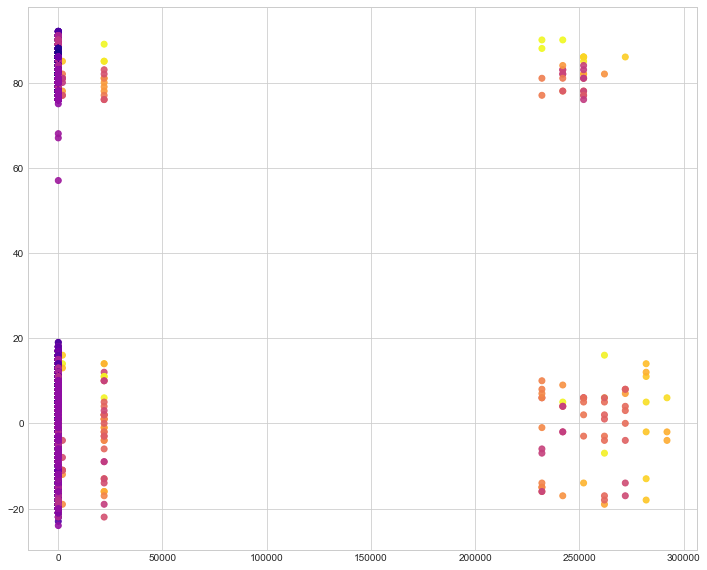

In [20]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=50)
model.fit(df)
pred = model.fit_predict(df)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(df["External_Temp"], df["Humidity"], c=pred, cmap='plasma', alpha=0.9)
plt.show()

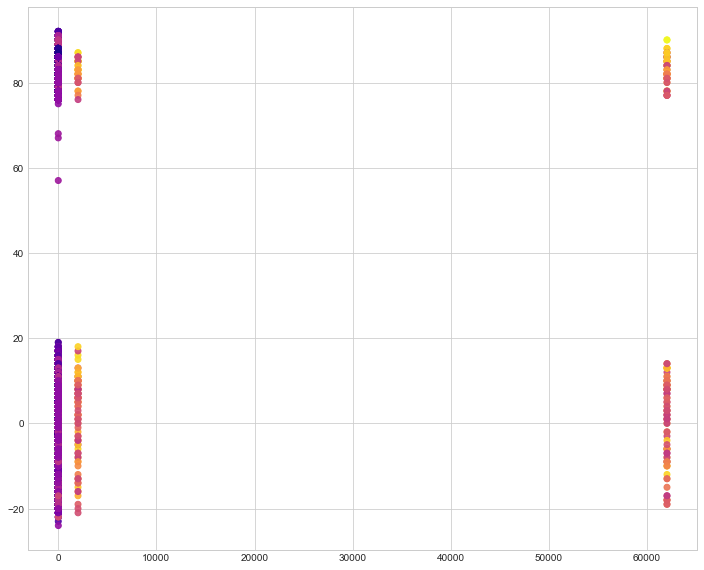

In [21]:
model = MeanShift(bandwidth=50)
model.fit(df)
pred = model.fit_predict(df)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(df["pH"], df["Humidity"], c=pred, cmap='plasma', alpha=0.9)
plt.show()

In [25]:
df.head(5)

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Internal_Temp,Humidity,Light,CO,External_Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54


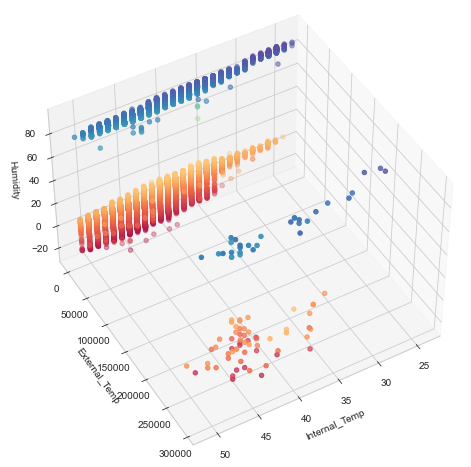

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['Internal_Temp'],df['External_Temp'], df['Humidity'], c=df['Humidity'], cmap='Spectral');
ax.set_xlabel('Internal_Temp')
ax.set_ylabel('External_Temp')
ax.set_zlabel('Humidity')
ax.view_init(45, 60)
plt.show()

In [11]:
x = df['Internal_Temp']
y = df['External_Temp']
z = df['PM2.5']

In [63]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(55, 60)
ax.plot_wireframe(df['Internal_Temp'],df['External_Temp'], df['Humidity'], color='blue')
ax.set_title('wireframe');


"\nfig = plt.figure()\nax = plt.axes(projection='3d')\nax.view_init(55, 60)\nax.plot_wireframe(df['Internal_Temp'],df['External_Temp'], df['Humidity'], color='blue')\nax.set_title('wireframe');\n"

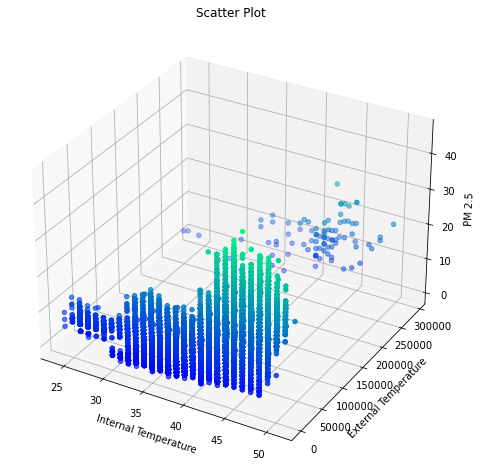

In [20]:

fig = plt.figure(figsize = (8 , 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z, c = z, cmap = 'winter')
ax.set_xlabel('Internal Temperature')
ax.set_ylabel('External Temperature')
ax.set_zlabel('PM 2.5')
ax.set_title("Scatter Plot")

plt.show()



Text(0.5, 0.92, 'Surface')

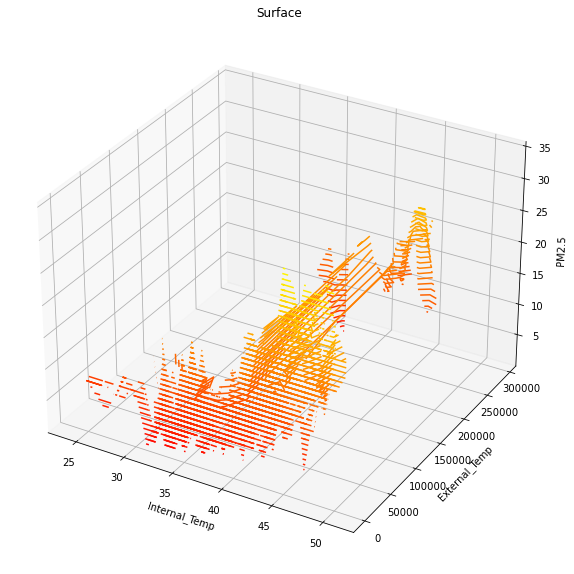

In [16]:
Z = df.pivot_table(index='Internal_Temp', columns='External_Temp', values='PM2.5').T.values
x_unique = np.sort(x.unique())
y_unique = np.sort(y.unique())
X, Y = np.meshgrid(x_unique, y_unique)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 50, cmap='autumn')
ax.set_xlabel('Internal_Temp')
ax.set_ylabel('External_Temp')
ax.set_zlabel('PM2.5')
ax.set_title('Surface')

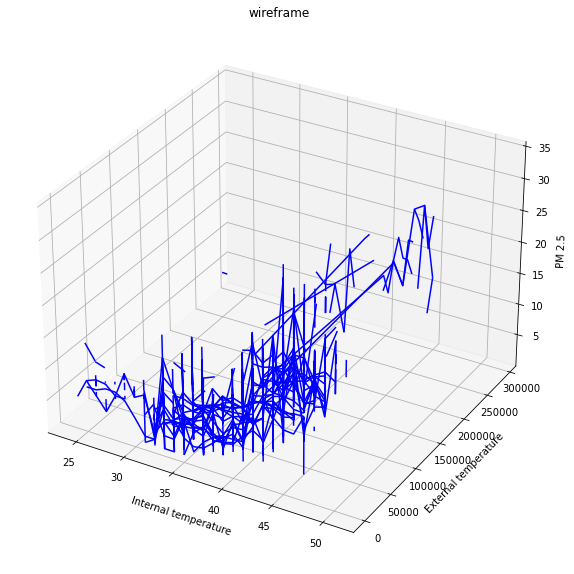

In [22]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color = 'Blue')
ax.set_xlabel('Internal temperature')
ax.set_ylabel('External temperature')
ax.set_zlabel('PM 2.5')
ax.set_title('wireframe');